In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\atorr\OneDrive - Instituto Politecnico Nacional\Documents\Julia Projects\Genetic Dinamic Programming\Segment\SegLeaSqu.csv", header=0)

In [4]:
len(df)

3888

In [3]:
df.head()

,p_mutation,Pop_Size,Num_Gen,num_points,num_seg,GA,GDPH,GDP
0,0.02,6,9,25,3,1.142660,1.072443,1.000000
1,0.02,6,17,25,3,1.113391,1.379433,1.050869
2,0.02,6,25,25,3,1.645745,1.546060,1.176271
3,0.02,6,33,25,3,1.077568,1.000000,1.000000
4,0.02,6,41,25,3,1.353574,1.390627,1.465043


In [5]:
df_complete = pd.melt(df, id_vars =['p_mutation','Pop_Size','Num_Gen','num_points','num_seg'], value_vars =['GA', 'GDPH','GDP'], var_name='algorithm', value_name='ratio')

In [6]:
len(df_complete)

11664

In [14]:
df_complete.tail()

,p_mutation,Pop_Size,Num_Gen,num_points,num_seg,algorithm,ratio
11659,0.015,86,75,200,8,1,2.235372
11660,0.015,86,113,200,8,1,2.162280
11661,0.015,86,150,200,8,1,2.026253
11662,0.015,86,188,200,8,1,1.886411
11663,0.015,86,225,200,8,1,2.129958


In [15]:
df_complete.to_csv('segment_test.csv',index=False)

In [8]:
df_complete['algorithm']=df_complete['algorithm'].astype('category').cat.codes

In [9]:
df_complete.head(5)

,p_mutation,Pop_Size,Num_Gen,num_points,num_seg,algorithm,ratio
0,0.02,6,9,25,3,0,1.142660
1,0.02,6,17,25,3,0,1.113391
2,0.02,6,25,25,3,0,1.645745
3,0.02,6,33,25,3,0,1.077568
4,0.02,6,41,25,3,0,1.353574


In [11]:
print("Maximo Naive")
df_complete.loc[df_complete['algorithm']==0,'ratio'].max()

Maximo Naive


5.377933538

In [16]:
print("Maximo Half DP")
df_complete.loc[df_complete['algorithm']==2,'ratio'].max()

Maximo Half DP


5.611775664

In [17]:
print("Maximo genDP")
df_complete.loc[df_complete['algorithm']==1,'ratio'].max()

Maximo genDP


4.495432268

In [18]:
ave = df_complete.groupby(["num_points","algorithm"])["ratio"].mean()
ave

num_points  algorithm
25          0            1.204496
            1            1.087981
            2            1.189066
50          0            1.358133
            1            1.171164
            2            1.355873
100         0            1.907737
            1            1.394415
            2            1.899286
130         0            2.266536
            1            1.525075
            2            2.245852
160         0            2.630010
            1            1.650808
            2            2.609617
200         0            3.142509
            1            1.828414
            2            3.109425
Name: ratio, dtype: float64

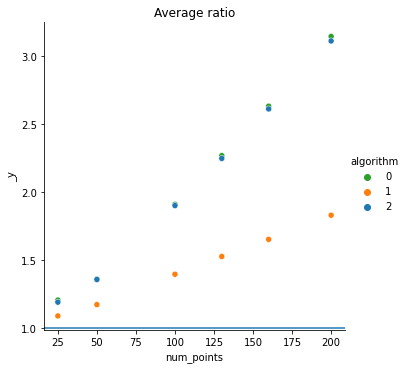

In [20]:
ave_tree_plot = sns.relplot(
    data=ave,
    x="num_points", y=ave.values,hue="algorithm",palette=["C2", "C1", "C0"],
    
).set(title='Average ratio')
ave_tree_plot.ax.axhline(1.00)

In [21]:
ave_num_points = df_complete.groupby(["num_points","num_seg","algorithm"])["ratio"].mean()
ave_num_points.tail()

num_points  num_seg  algorithm
200         5        1            1.792086
                     2            2.992520
            8        0            2.454529
                     1            1.599587
                     2            2.427483
Name: ratio, dtype: float64

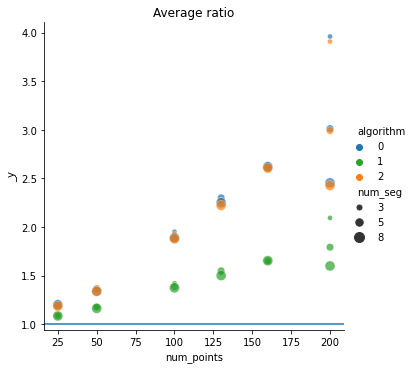

In [33]:
ave_num_points_plot = sns.relplot(
    data=ave_num_points,
    x="num_points", y=ave_num_points.values,hue="algorithm",sizes=(25,100),size="num_seg",alpha=0.7,palette=["C0", "C2", "C1"]
   
).set(title='Average ratio')
ave_num_points_plot.ax.axhline(1.00)

In [34]:
ave_complete = df_complete.groupby(["num_points","num_seg","p_mutation","Pop_Size","Num_Gen","algorithm"])["ratio"].mean()
ave_complete.tail()

num_points  num_seg  p_mutation  Pop_Size  Num_Gen  algorithm
200         8        0.015       86        188      1            1.886411
                                                    2            2.481080
                                           225      0            2.800269
                                                    1            2.129958
                                                    2            2.753364
Name: ratio, dtype: float64

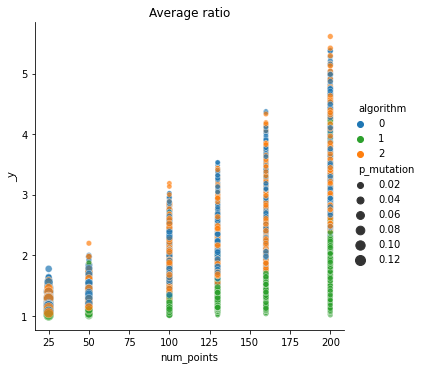

In [36]:
ave_complete_plot = sns.relplot(
    data=ave_complete,
    x="num_points", y=ave_complete.values,hue="algorithm",sizes=(25,100),size="p_mutation",alpha=0.7,palette=["C0", "C2", "C1"]
   
).set(title='Average ratio')
ave_num_points_plot.ax.axhline(1.00)

In [40]:
df_alg_index= df_complete.groupby(['algorithm'])

In [41]:
df_alg_index.groups.keys()

dict_keys([0, 1, 2])

# Naive DP

In [44]:
naive_avg_complete= df_alg_index.get_group(0).groupby(["num_points","num_seg","p_mutation","Pop_Size","Num_Gen"])["ratio"].mean()

In [45]:
naive_avg_complete.head()

num_points  num_seg  p_mutation  Pop_Size  Num_Gen
25          3        0.02        6         9          1.142660
                                           17         1.113391
                                           25         1.645745
                                           33         1.077568
                                           41         1.353574
Name: ratio, dtype: float64

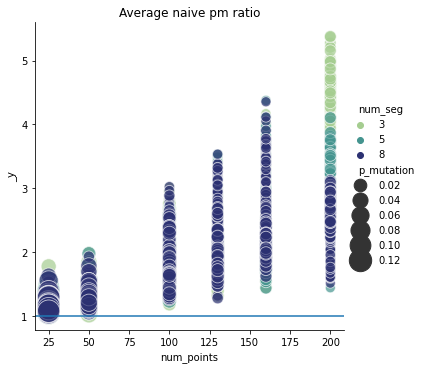

In [70]:
naive_avg_complete_plot = sns.relplot(
    data=naive_avg_complete,
    x="num_points", y=naive_avg_complete.values, sizes=(100, 500),size="p_mutation",hue="num_seg",alpha=0.7,palette='crest'
    
).set(title='Average naive pm ratio')
naive_avg_complete_plot.ax.axhline(1.00)

In [50]:
naive_avg_seg= df_alg_index.get_group(0).groupby(["num_points","num_seg"])["ratio"].mean()

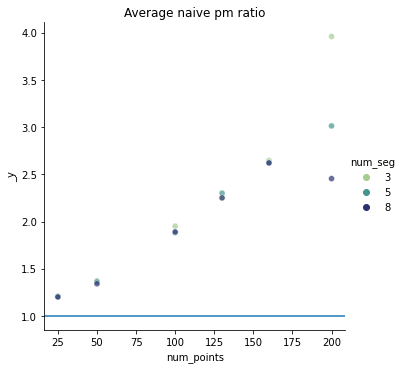

In [72]:
naive_avg_complete_plot = sns.relplot(
    data=naive_avg_seg,
    x="num_points", y=naive_avg_seg.values, hue="num_seg",alpha=0.7,palette='crest'
    
).set(title='Average naive pm ratio')
naive_avg_complete_plot.ax.axhline(1.00)

In [53]:
naive_avg_pm= df_alg_index.get_group(0).groupby(["num_points","num_seg","p_mutation"])["ratio"].mean()

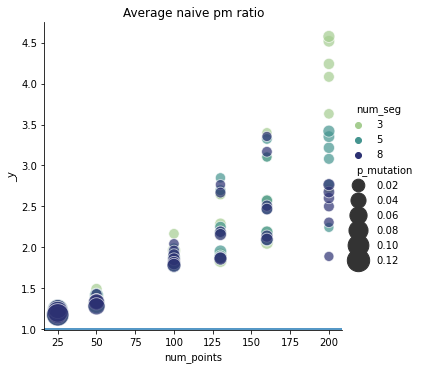

In [73]:
naive_avg_pm_plot = sns.relplot(
    data=naive_avg_pm,
    x="num_points", y=naive_avg_pm.values, hue="num_seg",size="p_mutation",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average naive pm ratio')
naive_avg_pm_plot.ax.axhline(1.00)

In [56]:
naive_avg_pop= df_alg_index.get_group(0).groupby(["num_points","num_seg","Pop_Size"])["ratio"].mean()

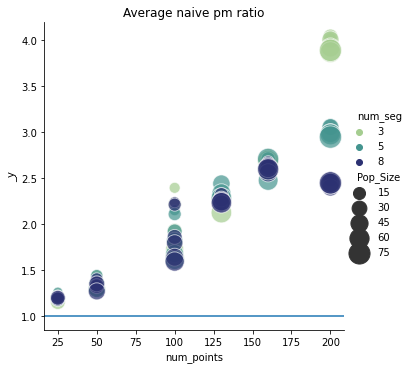

In [74]:
naive_avg_pop_plot = sns.relplot(
    data=naive_avg_pop,
    x="num_points", y=naive_avg_pop.values, hue="num_seg",size="Pop_Size",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average naive pm ratio')
naive_avg_pop_plot.ax.axhline(1.00)

In [58]:
naive_avg_gen= df_alg_index.get_group(0).groupby(["num_points","num_seg","Num_Gen"])["ratio"].mean()

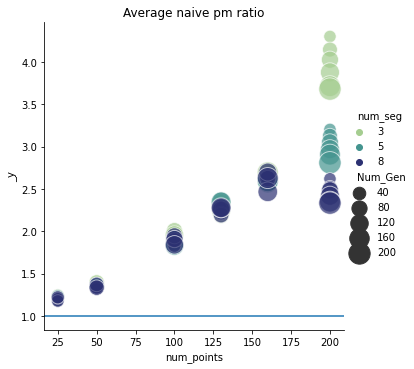

In [69]:
naive_avg_gen_plot = sns.relplot(
    data=naive_avg_gen,
    x="num_points", y=naive_avg_gen.values, hue="num_seg",size="Num_Gen",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average naive pm ratio')
naive_avg_gen_plot.ax.axhline(1.00)

# HALF DP

In [78]:
halfDP_avg_complete= df_alg_index.get_group(2).groupby(["num_points","num_seg","p_mutation","Pop_Size","Num_Gen"])["ratio"].mean()

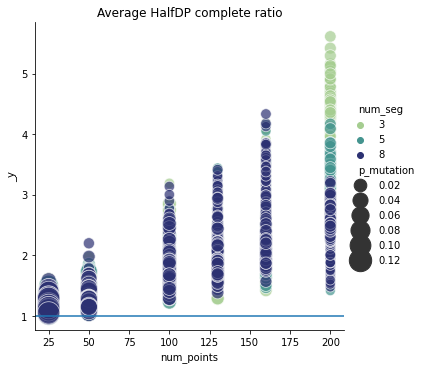

In [79]:
halfDP_avg_complete_plot = sns.relplot(
    data=halfDP_avg_complete,
    x="num_points", y=halfDP_avg_complete.values, sizes=(100, 500),size="p_mutation",hue="num_seg",alpha=0.7,palette='crest'
    
).set(title='Average HalfDP complete ratio')
halfDP_avg_complete_plot.ax.axhline(1.00)

In [80]:
halfDP_avg_pm= df_alg_index.get_group(2).groupby(["num_points","num_seg","p_mutation"])["ratio"].mean()

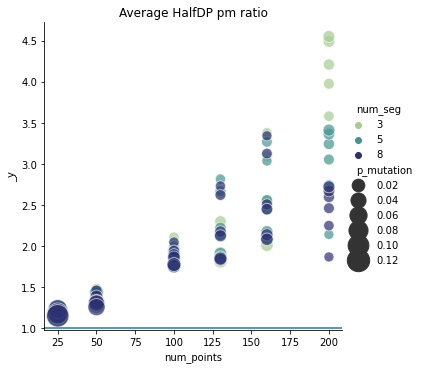

In [81]:
halfDP_avg_pm_plot = sns.relplot(
    data=halfDP_avg_pm,
    x="num_points", y=halfDP_avg_pm.values, hue="num_seg",size="p_mutation",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average HalfDP pm ratio')
halfDP_avg_pm_plot.ax.axhline(1.00)

In [82]:
halfDP_avg_pop= df_alg_index.get_group(2).groupby(["num_points","num_seg","Pop_Size"])["ratio"].mean()

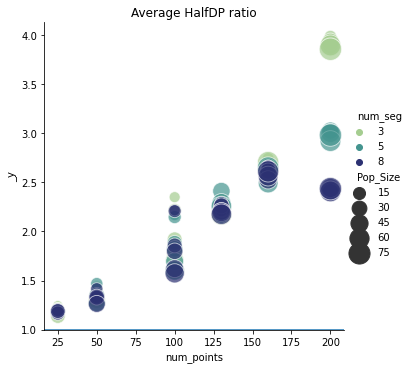

In [83]:
halfDP_avg_pop_plot = sns.relplot(
    data=halfDP_avg_pop,
    x="num_points", y=halfDP_avg_pop.values, hue="num_seg",size="Pop_Size",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average HalfDP Population size ratio')
halfDP_avg_pop_plot.ax.axhline(1.00)

In [85]:
halfDP_avg_gen= df_alg_index.get_group(2).groupby(["num_points","num_seg","Num_Gen"])["ratio"].mean()

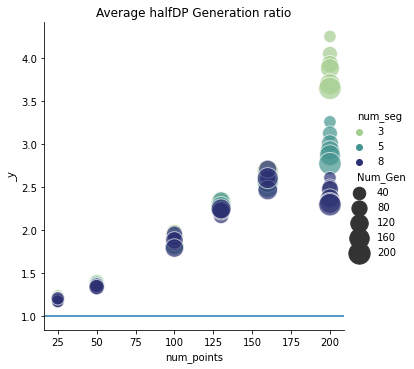

In [86]:
halfDP_avg_gen_plot = sns.relplot(
    data=halfDP_avg_gen,
    x="num_points", y=halfDP_avg_gen.values, hue="num_seg",size="Num_Gen",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average halfDP Generation ratio')
halfDP_avg_gen_plot.ax.axhline(1.00)

# GenDP

In [89]:
genDP_avg_complete= df_alg_index.get_group(1).groupby(["num_points","num_seg","p_mutation","Pop_Size","Num_Gen"])["ratio"].mean()

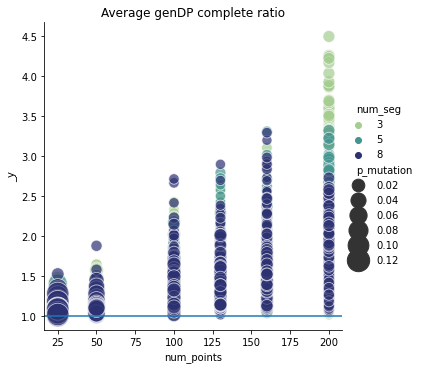

In [91]:
genDP_avg_pm_plot = sns.relplot(
    data=genDP_avg_complete,
    x="num_points", y=genDP_avg_complete.values, hue="num_seg",size="p_mutation",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average genDP complete ratio')
genDP_avg_pm_plot.ax.axhline(1.00)

In [92]:
genDP_avg_pm= df_alg_index.get_group(1).groupby(["num_points","num_seg","p_mutation"])["ratio"].mean()

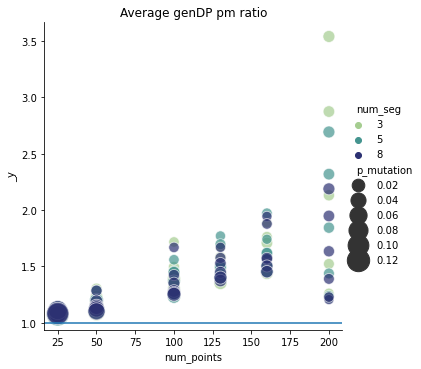

In [94]:
genDP_avg_pm_plot = sns.relplot(
    data=genDP_avg_pm,
    x="num_points", y=genDP_avg_pm.values, hue="num_seg",size="p_mutation",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average genDP pm ratio')
genDP_avg_pm_plot.ax.axhline(1.00)

In [95]:
genDP_avg_pop= df_alg_index.get_group(1).groupby(["num_points","num_seg","Pop_Size"])["ratio"].mean()

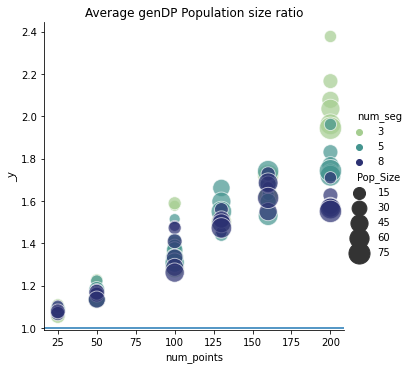

In [96]:
genDP_avg_pop_plot = sns.relplot(
    data=genDP_avg_pop,
    x="num_points", y=genDP_avg_pop.values, hue="num_seg",size="Pop_Size",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average genDP Population size ratio')
genDP_avg_pop_plot.ax.axhline(1.00)

In [97]:
genDP_avg_gen= df_alg_index.get_group(1).groupby(["num_points","num_seg","Num_Gen"])["ratio"].mean()

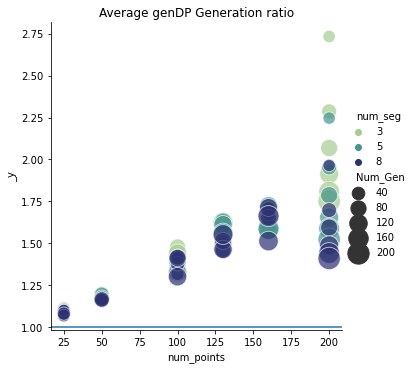

In [98]:
genDP_avg_gen_plot = sns.relplot(
    data=genDP_avg_gen,
    x="num_points", y=genDP_avg_gen.values, hue="num_seg",size="Num_Gen",sizes=(100, 500),alpha=0.7,palette='crest'
    
).set(title='Average genDP Generation ratio')
genDP_avg_gen_plot.ax.axhline(1.00)